In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [19]:
import requests
import pandas as pd
import json
from pandas import json_normalize
import xml.etree.ElementTree as ET

url = 'http://api.sexoffender.go.kr/openapi/SOCitysStats/'
response = requests.get(url)
xml_string = response.text

root = ET.fromstring(xml_string)
rows = []
for city in root.findall('City'):
    name = city.find('city-name').text
    count = city.find('city-count').text
    rows.append({'City': name, 'Count': int(count)})
df = pd.DataFrame(rows)
df

,City,Count
0,강원도,120
1,경기도,698
2,경상남도,234
3,경상북도,206
4,광주광역시,117
5,기타,561
6,대구광역시,144
7,대전광역시,79
8,부산광역시,178
9,서울특별시,428


In [6]:
a = pd.read_csv('범죄빈발지2021.csv', header=None,
                names=['year', 'addr1', 'addr2', 'report', 'family_violence', 'date_violence', 'sexual_violence',
                      'hidden_cam', 'murder', 'robbery', 'theft', 'violent'])
print(a.shape)
a.head()

(250, 12)


,year,addr1,addr2,report,family_violence,date_violence,sexual_violence,hidden_cam,murder,robbery,theft,violent
0,2021,강원도,강릉시,5439,1148,280,98,1,1,5,1411,2496
1,2021,강원도,고성군,344,57,14,7,0,0,0,110,156
2,2021,강원도,동해시,2000,481,84,21,0,0,0,544,870
3,2021,강원도,삼척시,1064,221,38,23,0,0,0,286,496
4,2021,강원도,속초시,3023,595,176,36,0,1,4,694,1517


In [12]:
sexual_vio = a.groupby(['addr2'])['sexual_violence'].sum().to_frame().reset_index().sort_values(by='sexual_violence', ascending=False)
sexual_vio.head()

,addr2,sexual_violence
24,관악구,3457
81,부평구,1977
89,서구,1840
48,남동구,1783
47,남구,1641


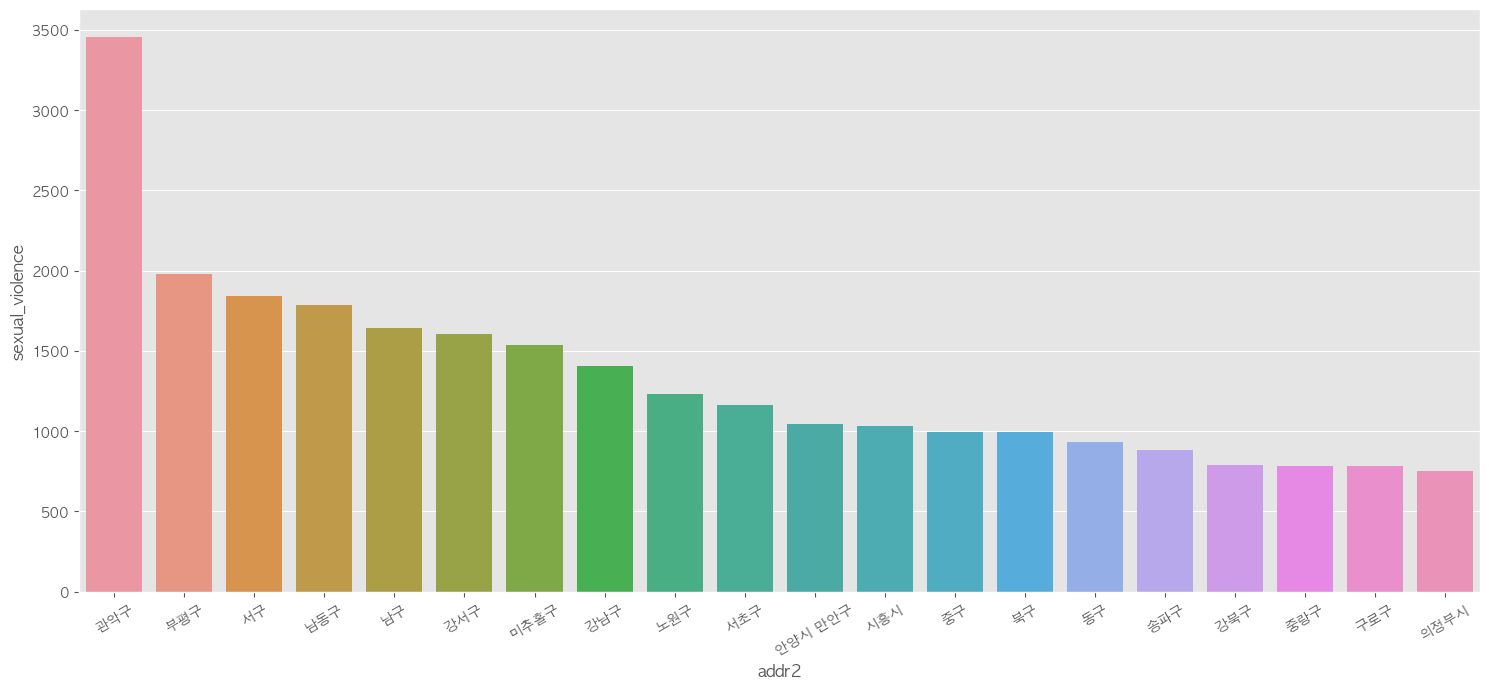

In [33]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=sexual_vio.head(20), x='addr2', y='sexual_violence')
ax.tick_params(axis='x', rotation=30)
plt.tight_layout()